# Radial basis function

Notebook by Jerome Eippers, 2024

In [1]:
%matplotlib widget
import numpy as np
from ipywidgets import widgets, interact
from matplotlib import pyplot as plt

We have a kernel function $\Phi$ that is a radial function because it only depends on the distance $||x - x_i||$

One of these kernels is the Gaussian kernel: $ \Phi = e^{- (\epsilon  r)^2} $

Our function will be the sum of all the kenel together to interpolate the values, but if we only sum them we will not pass through our example points ($x_i$), so we have to scale ($w_i$) each values to make sure we pass though the data points
$$
f(x) = \sum_{i=1}^{n} w_k \Phi(||x -x_i||)
$$
Let $\Phi_{i,j} = \Phi(||x_i -x_j||)$ the system of equations becomes :
$$
\begin{bmatrix} 
    \Phi_{1,1} & \Phi_{1,2} & \dots &\Phi_{1,n} \\ 
    \Phi_{2,1} & \Phi_{2,2} & \dots &\Phi_{2,n} \\ 
    \vdots & \vdots & \ddots & \vdots \\ 
    \Phi_{n,1} & \Phi_{n,2} & \dots &\Phi_{n,n} \\ 
\end{bmatrix}
\begin{bmatrix} 
    w_1 \\ 
    w_2 \\ 
    \vdots \\
    w_n \\ 
\end{bmatrix}
=
\begin{bmatrix} 
    f_1 \\ 
    f_2 \\ 
    \vdots \\
    f_n \\ 
\end{bmatrix}
\Longrightarrow
\Phi \textbf{w}  =  \textbf{f}
$$
Then we solve for $\textbf{w}$

In [2]:
def gauss(radius, epsilon):
    return np.exp(-(epsilon*radius)**2)

In [3]:
def example_function(x):
    return -2*x**3 + 3*x**2

In [4]:
xs = np.array([0, .3, .8, 1.0, 1.3])
ys = example_function(xs)

plot_x = np.linspace(-0.2, 1.5, 100)
plot_y = example_function(plot_x)

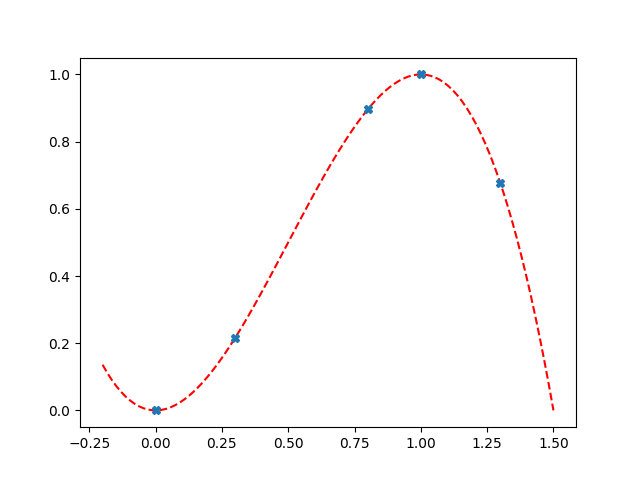

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(plot_x, plot_y, '--r')
ax.plot(xs, ys, 'X')

interactive(children=(IntSlider(value=3, description='eps', max=8, min=1), Output()), _dom_classes=('widget-in…

<function __main__.gauss_example(eps)>

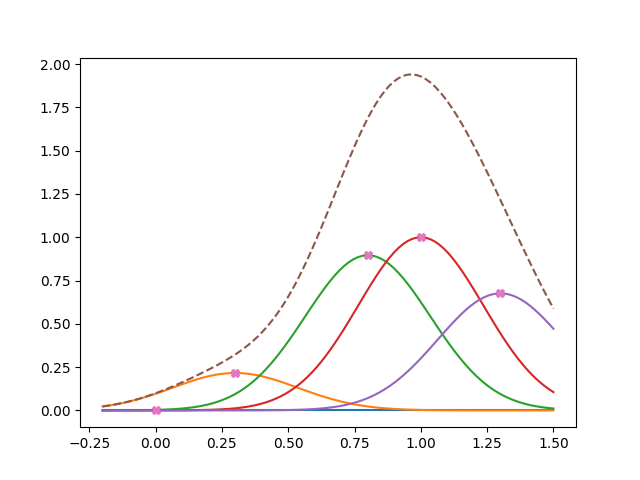

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

def gauss_example(eps):
    
    plot_gauss = np.zeros([xs.shape[0], plot_x.shape[0]])
    for i in range(xs.shape[0]):
        plot_gauss[i, :] = gauss(plot_x - xs[i], eps) * ys[i]
    
    ax.cla()
    for i in range(xs.shape[0]):
        ax.plot(plot_x, plot_gauss[i, :])
    
    ax.plot(plot_x, np.sum(plot_gauss, axis=0), '--')
    ax.plot(xs, ys, 'X')
    
interact(
    gauss_example, 
    eps= widgets.IntSlider(min=1, max=8, step=1, value=3)
)

In [8]:
eps = 2

In [9]:
distances = np.abs(xs[:, np.newaxis] - xs[np.newaxis, :])
display(distances)
phi = gauss(distances, eps)
display(phi)

array([[0. , 0.3, 0.8, 1. , 1.3],
       [0.3, 0. , 0.5, 0.7, 1. ],
       [0.8, 0.5, 0. , 0.2, 0.5],
       [1. , 0.7, 0.2, 0. , 0.3],
       [1.3, 1. , 0.5, 0.3, 0. ]])

array([[1.        , 0.69767633, 0.07730474, 0.01831564, 0.00115923],
       [0.69767633, 1.        , 0.36787944, 0.14085842, 0.01831564],
       [0.07730474, 0.36787944, 1.        , 0.85214379, 0.36787944],
       [0.01831564, 0.14085842, 0.85214379, 1.        , 0.69767633],
       [0.00115923, 0.01831564, 0.36787944, 0.69767633, 1.        ]])

In [10]:
w = np.linalg.solve(phi, ys)
w

array([-1.30669487e-01,  1.57376259e-01,  4.73447467e-02,  9.39719023e-01,
        2.32154459e-04])

Now that we have a w, we can use it to interpolate the values
$$
f(x) = \sum_{i=1}^{n} w_k \Phi(||x -x_i||)
$$
can be written as a matrix multiplication
$$
\begin{bmatrix} 
    \Phi(||x - x_1||) & \Phi(||x - x_2||) & \dots \Phi(||x - x_n||)
\end{bmatrix}
\begin{bmatrix} 
    w_1 \\ 
    w_2 \\ 
    \vdots \\
    w_n \\ 
\end{bmatrix}
= f
$$

compute one value

In [11]:
distances = np.abs(0.5 - xs[np.newaxis, :])
phi = gauss(distances, eps)
y_05 = np.dot(phi, w)

compute all the values of the plot at once

In [12]:
distances = np.abs(plot_x[:, np.newaxis] - xs[np.newaxis, :])
phi = gauss(distances, eps)
interpolated = np.dot(phi, w)

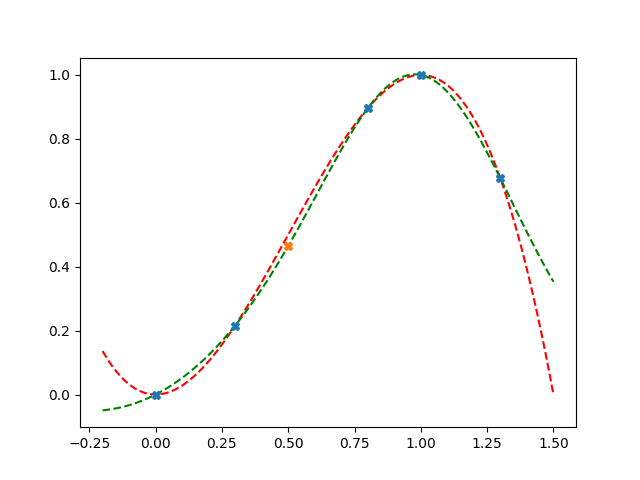

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(plot_x, plot_y, '--r')
ax.plot(plot_x, interpolated, '--g')
ax.plot(xs, ys, 'X')

ax.plot(0.5, y_05, 'X')

## Polynomial augmentation

In this case we have another set of points that will not be well interpolated with the use of pure Gaussian Kernel.

(0.0, 3.0)

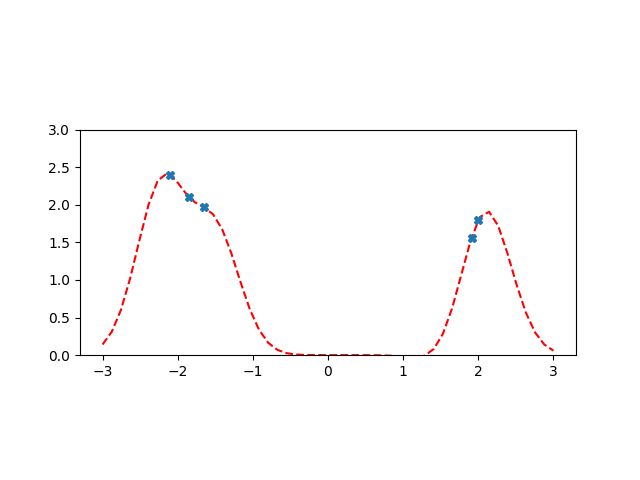

In [20]:
def example_function(x):
    return 0.35*x**2 - .15*x + .7

xs = np.array([-2.0, -1.8, -1.7, 1.8, 2.0])
ys = example_function(xs)
xs = np.array([-2.1, -1.85, -1.65, 1.91, 2.0])

plot_x = np.linspace(-3, 3, 50)

distances = np.abs(xs[:, np.newaxis] - xs[np.newaxis, :])
phi = gauss(distances, eps)
w = np.linalg.solve(phi, ys)

distances = np.abs(plot_x[:, np.newaxis] - xs[np.newaxis, :])
phi = gauss(distances, eps)
interpolated = np.dot(phi, w)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(plot_x, interpolated, '--r')
ax.plot(xs, ys, 'X')
ax.set_aspect('equal')
ax.set_ylim(0, 3)

To make our interpolant able to represent polynomial function, we append a set of constraints to our system equations :
$$
\Phi \textbf{w} + \textbf{P}c =  \textbf{f}
$$
where $\textbf{P}$ is the polynomial basis of set of polynomials $\Pi_m^n$ with $n$ variables of degree $m$. And $c$ is the coefficients of the polynomial basis.  
For a degree of 2, $\textbf{P}$ is:
$$
\textbf{P} = 
\begin{bmatrix} 
    1 & x_1 & x_1^2 \\ 
    1 & x_2 & x_2^2 \\ 
    \vdots & \vdots & \vdots \\ 
    1 & x_n & x_n^2 \\ 
\end{bmatrix}
$$

In [21]:
P = np.zeros([xs.shape[0], 3])
for i in range(3):
    P[:, i] = xs**i
P

array([[ 1.    , -2.1   ,  4.41  ],
       [ 1.    , -1.85  ,  3.4225],
       [ 1.    , -1.65  ,  2.7225],
       [ 1.    ,  1.91  ,  3.6481],
       [ 1.    ,  2.    ,  4.    ]])

We can turn all the constraints into one matrix form as :
$$
\begin{bmatrix} 
    \Phi & \textbf{P} \\ 
    \textbf{P}^T & 0 \\ 
\end{bmatrix}
\begin{bmatrix} 
    W \\
    c \\
\end{bmatrix}
=
\begin{bmatrix} 
    f \\
    0 \\
\end{bmatrix}
$$

And solve for the vector $
\begin{bmatrix} 
    W \\
    c \\
\end{bmatrix}
$

In [22]:
distances = np.abs(xs[:, np.newaxis] - xs[np.newaxis, :])
phi = gauss(distances, eps)

extended_phi = np.zeros([phi.shape[0] + P.shape[1], phi.shape[1] + P.shape[1]])
extended_phi[:phi.shape[0], :phi.shape[1]] = phi
extended_phi[:P.shape[0], phi.shape[1]:] = P
extended_phi[phi.shape[0]:, :P.shape[0]] = P.T


In [23]:
extended_ys = np.zeros([ys.shape[0] + P.shape[1]])
extended_ys[:xs.shape[0]] = ys

w = np.linalg.solve(extended_phi, extended_ys)
w

array([-0.05885906, -0.51143152,  0.6442346 , -1.5680313 ,  1.49408727,
        0.38705021, -0.13921782,  0.42883486])

Then once we have $W$ and $c$, we can use them to interpolate our values.

In [24]:
interpolated = np.zeros_like(plot_x)

for r in range(plot_x.shape[0]):
    value = plot_x[r]
    P = np.array([[1, value, value**2]])
    distances = np.abs(value - xs[np.newaxis, :])
    phi = gauss(distances, eps)
    
    extended_phi = np.zeros([phi.shape[0] + P.shape[1], phi.shape[1] + P.shape[1]])
    extended_phi[:phi.shape[0], :phi.shape[1]] = phi
    extended_phi[:P.shape[0], phi.shape[1]:] = P
    extended_phi[phi.shape[0]:, :P.shape[0]] = P.T

    interpolated[r] = np.dot(extended_phi, w)[0] # only the first one that is f


(0.0, 3.0)

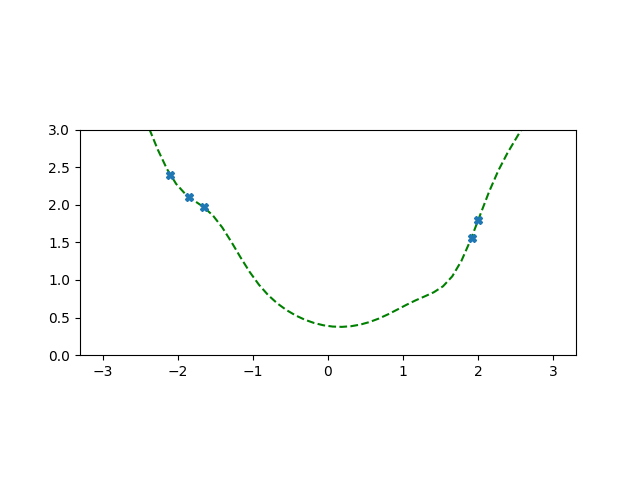

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(plot_x, interpolated, '--g')
ax.plot(xs, ys, 'X')
ax.set_aspect('equal')
ax.set_ylim(0, 3)